In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint 
import os


# Find where training and testing data are located
for dirname, subdir, filenames in os.walk("."):
    for filename in filenames:
        if "train.csv" in filename:
            train_data_filepath = os.path.join(dirname, filename)
        if "test.csv"  in filename:
            test_data_filepath = os.path.join(dirname, filename)

            
# Print the location of testing and training data
print(train_data_filepath, test_data_filepath)


.\train.csv .\test.csv


In [6]:
train_data = pd.read_csv(train_data_filepath)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data = pd.read_csv(test_data_filepath)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
women = train_data.loc[train_data['Sex']=='female']['Survived']

rate_women = sum(women)/len(women)
print(f'% of women survived : {rate_women}')

% of women survived : 0.7420382165605095


In [9]:
men = train_data.loc[train_data.Sex=='male']['Survived']

rate_men = sum(men)/len(men)
print(f'% of men survived : {rate_men}')

% of men survived : 0.18890814558058924


### Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

predictions = model.predict(X_test)


output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('.\output.csv', index=False)

# Linear Regression

In [11]:
# Training Features

train_features = ["Pclass", "Sex", "Age", "SibSp", "Parch"]
train_linear = train_data.copy()
train_linear = pd.get_dummies(train_linear[train_features])
new_train_features = ["Pclass", "Sex_female", "Sex_male", "Age", "SibSp", "Parch"]

#feature array
f_array = np.array(train_linear[new_train_features])  


#Imputation - Median
null_age = np.isnan(f_array[:,3])
valid_ages = f_array[~null_age][:, 3]
median_age = np.median(valid_ages)

f_array[:,3] = np.where(np.isnan(f_array[:,3]), median_age, f_array[:,3])

X = f_array


In [12]:
# Test Feature Array

test_features = train_features
test_linear = test_data.copy()
test_linear = pd.get_dummies(test_linear[test_features])
new_test_features = new_train_features

#feature array
test_f_array = np.array(test_linear[new_test_features])  #feature array

#Imputation - Median
null_age = np.isnan(test_f_array[:,3])
valid_ages = test_f_array[~null_age][:, 3]
median_age = np.median(valid_ages)

test_f_array[:,3] = np.where(np.isnan(test_f_array[:,3]), median_age, test_f_array[:,3])

X_test = test_f_array

In [13]:
# training feature matrix
X

# testing feature matrix
X_test

# output vector
y = np.array(train_data['Survived'])

# theta 
theta = np.zeros(len(new_train_features))



### Linear Regression Model

In [14]:
class LinearRegression():
    
    def __init__(self, features, values, theta, alpha=0.01, num_iterations=100):
        self.features = features
        self.output = values
        self.predicted = values*0
        self.theta = theta
        self.theta_vector = []    # history of theta values
        self.alpha = alpha 
        self.m = len(values)
        self.n = num_iterations
        self.J = 0
        self.J_vector = []        # history of cost through iterations
        
    def cost_fn(self):
        self.J = np.sum(np.square(self.output-self.predicted)) / (2*self.m) 
        self.J_vector.append(self.J)
        
    def gradient_descent(self):
        for _ in range(self.n):
            delta_J = np.dot(self.features.T, self.predicted-self.output)
            self.theta = self.theta - ((delta_J*self.alpha)/self.m)
            self.predicted = np.dot(self.features, self.theta)
            self.cost_fn()
            self.theta_vector.append(self.theta)

            

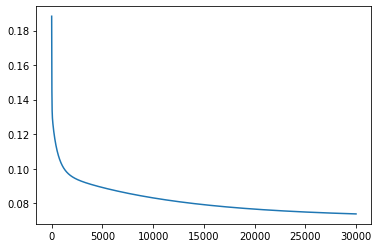

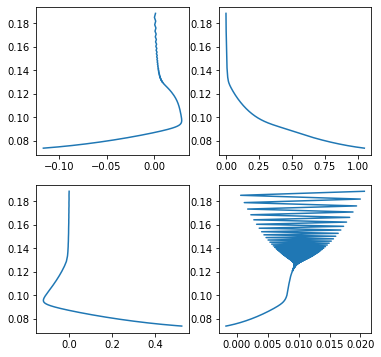

In [15]:
lin_reg = LinearRegression(X, y, theta, 0.0019, 30000)
lin_reg.gradient_descent()
plt.plot(lin_reg.J_vector)

fig, ax = plt.subplots(2,2, figsize=(6,6))
t1 = np.array(lin_reg.theta_vector)[:,0]   #theta
t2 = np.array(lin_reg.theta_vector)[:,1]
t3 = np.array(lin_reg.theta_vector)[:,2]
t4 = np.array(lin_reg.theta_vector)[:,3]
j = np.array(lin_reg.J_vector)

ax[0][0].plot(t1, j)
ax[0][1].plot(t2, j)
ax[1][0].plot(t3, j)
ax[1][1].plot(t4, j)


### Theta 

In [16]:
lin_reg.theta

array([-0.11652329,  1.04795617,  0.52403681, -0.00174584, -0.03221991,
       -0.00301966])

## Apply Model to Test Dataset

In [17]:
y_test = X_test.dot(lin_reg.theta)

test_descriptive = test_data[['PassengerId', 'Sex', 'Name', 'Age', 'SibSp', 'Parch']].copy()
test_descriptive['Survived'] =  y_test

test_descriptive

,PassengerId,Sex,Name,Age,SibSp,Parch,Survived
0,892,male,"Kelly, Mr. James",34.5,0,0,0.114235
1,893,female,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,0.584112
2,894,male,"Myles, Mr. Thomas Francis",62.0,0,0,0.182748
3,895,male,"Wirz, Mr. Albert",27.0,0,0,0.127329
4,896,female,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,0.624738
...,...,...,...,...,...,...,...
413,1305,male,"Spector, Mr. Woolf",NaN,0,0,0.127329
414,1306,female,"Oliva y Ocana, Dona. Fermina",39.0,0,0,0.863345
415,1307,male,"Saether, Mr. Simon Sivertsen",38.5,0,0,0.107252
416,1308,male,"Ware, Mr. Frederick",NaN,0,0,0.127329


In [18]:
# Check this
test_descriptive['Survived'] = np.where(test_descriptive['Survived']>=0.5, 1, 0)
test_descriptive

,PassengerId,Sex,Name,Age,SibSp,Parch,Survived
0,892,male,"Kelly, Mr. James",34.5,0,0,0
1,893,female,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,1
2,894,male,"Myles, Mr. Thomas Francis",62.0,0,0,0
3,895,male,"Wirz, Mr. Albert",27.0,0,0,0
4,896,female,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,1
...,...,...,...,...,...,...,...
413,1305,male,"Spector, Mr. Woolf",NaN,0,0,0
414,1306,female,"Oliva y Ocana, Dona. Fermina",39.0,0,0,1
415,1307,male,"Saether, Mr. Simon Sivertsen",38.5,0,0,0
416,1308,male,"Ware, Mr. Frederick",NaN,0,0,0


In [19]:
women_survived = test_descriptive[test_descriptive.Sex=='female'].Survived.sum()/test_descriptive[test_descriptive.Sex=='female'].Survived.count()
women_survived

men_survived = test_descriptive[test_descriptive.Sex=='male'].Survived.sum()/test_descriptive[test_descriptive.Sex=='male'].Survived.count()
print(f'Men: {men_survived} %, \nWomen: {women_survived} %')

Men: 0.0 %, 
Women: 0.9868421052631579 %


In [20]:
output = test_descriptive[['PassengerId', 'Survived']]
output.to_csv('Submission.csv', index=False)

## Linear Regression using sklearn 



In [21]:
from sklearn.linear_model import LinearRegression as RG

regressor = RG().fit(X, y)
regressor.coef_

array([-0.18462016,  0.25733476, -0.25733476, -0.00589768, -0.04117188,
       -0.01517848])

In [22]:
y_predict = regressor.predict(X_test)


In [23]:
test_descriptive = test_data[['PassengerId', 'Sex', 'Name', 'Age', 'SibSp', 'Parch']].copy()
test_descriptive['Survived'] =  y_predict

test_descriptive

,PassengerId,Sex,Name,Age,SibSp,Parch,Survived
0,892,male,"Kelly, Mr. James",34.5,0,0,0.071844
1,893,female,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,0.471621
2,894,male,"Myles, Mr. Thomas Francis",62.0,0,0,0.094278
3,895,male,"Wirz, Mr. Albert",27.0,0,0,0.116077
4,896,female,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,0.603884
...,...,...,...,...,...,...,...
413,1305,male,"Spector, Mr. Woolf",NaN,0,0,0.116077
414,1306,female,"Oliva y Ocana, Dona. Fermina",39.0,0,0,0.929214
415,1307,male,"Saether, Mr. Simon Sivertsen",38.5,0,0,0.048253
416,1308,male,"Ware, Mr. Frederick",NaN,0,0,0.116077


In [24]:
test_descriptive['Survived'] = np.where(test_descriptive['Survived']>=0.5, 1, 0)

women_survived = test_descriptive[test_descriptive.Sex=='female'].Survived.sum()/test_descriptive[test_descriptive.Sex=='female'].Survived.count()
women_survived

men_survived = test_descriptive[test_descriptive.Sex=='male'].Survived.sum()/test_descriptive[test_descriptive.Sex=='male'].Survived.count()
print(f'Men: {men_survived} %, \nWomen: {women_survived} %')

test_descriptive

Men: 0.015037593984962405 %, 
Women: 0.9605263157894737 %


,PassengerId,Sex,Name,Age,SibSp,Parch,Survived
0,892,male,"Kelly, Mr. James",34.5,0,0,0
1,893,female,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,0
2,894,male,"Myles, Mr. Thomas Francis",62.0,0,0,0
3,895,male,"Wirz, Mr. Albert",27.0,0,0,0
4,896,female,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,1
...,...,...,...,...,...,...,...
413,1305,male,"Spector, Mr. Woolf",NaN,0,0,0
414,1306,female,"Oliva y Ocana, Dona. Fermina",39.0,0,0,1
415,1307,male,"Saether, Mr. Simon Sivertsen",38.5,0,0,0
416,1308,male,"Ware, Mr. Frederick",NaN,0,0,0


(array([511.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 489.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

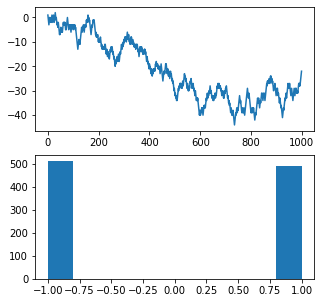

In [25]:
# Random testing
a  = np.array([1 if np.random.randint(0,2) else -1 for _ in range(1000)])
aa= np.cumsum(a)
fig, ax = plt.subplots(2,1, figsize=(5,5))
ax[0].plot(aa)
ax[1].hist(a)


# EDA

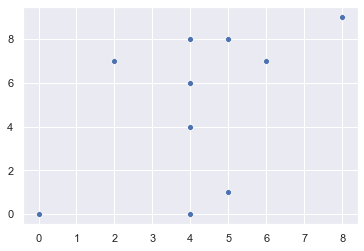

In [26]:
import seaborn as sns
sns.set(style='darkgrid')
x, y = np.random.randint(10, size=10),np.random.randint(10, size=10)
sns.scatterplot(list(x),list(y))

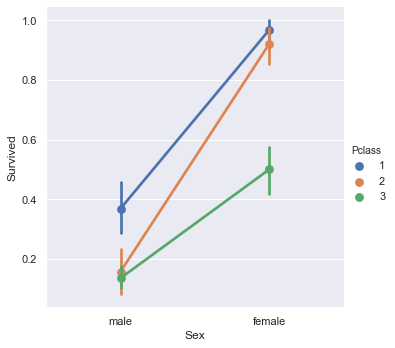

In [27]:
sns.catplot(kind='point', x="Sex", y="Survived", hue="Pclass", data=train_data[['Sex',"Pclass", 'Survived']])

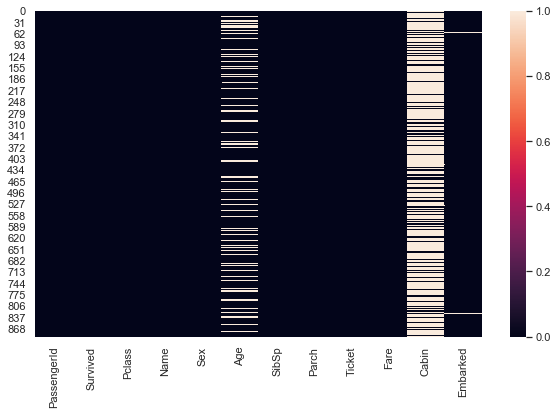

In [129]:
# can see Cabin is mostly null data and Age has a lot of gaps in the data
plt.subplots(figsize=(10,6))
sns.heatmap(train_data.isnull())

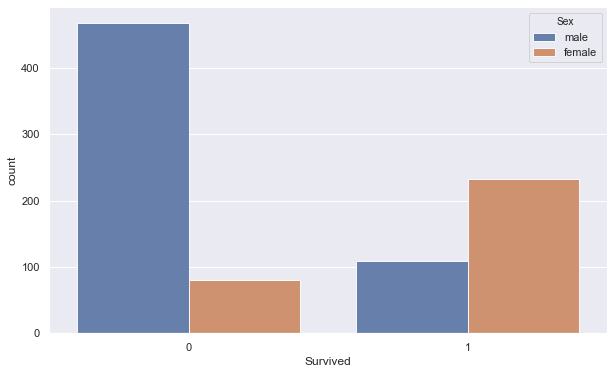

In [133]:
f, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='Survived', hue='Sex', data=train_data, alpha=0.9, ax=ax)


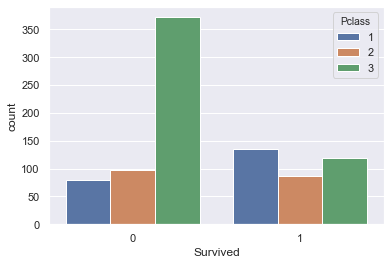

In [39]:
sns.countplot(x='Survived', hue='Pclass', data=train_data)

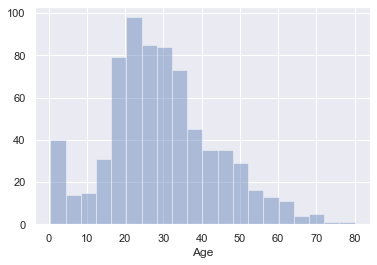

In [134]:
sns.distplot(train_data['Age'], kde=False)

# WORKFLOW (https://www.kaggle.com/startupsci/titanic-data-science-solutions)

In [46]:
# What features are available?
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

Categorical: **Survived, Sex, and Embarked**. Ordinal: **Pclass**.

===============================================================================================================================


**Which features are numerical?**

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

Continuous: **Age, Fare**. Discrete: **SibSp, Parch.**

In [51]:
#Preview Data

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Which features are Alpha-numeric?**

Cabin - Alphanumeric

Ticket - Alphanumeric or Numeric (mix of both)

In [63]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Which features are NULL data?**

Looks like **Cabin > Age > Embarked** features have NULL values in training dataset.

In [68]:
train_data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

Looks like **Cabin > Age > Fare** features have NULL values in testing dataset.

In [69]:
test_data.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

**What are the data-types for various features?**


In [78]:
train_data.info()
print('_'*40+"\n")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

In [101]:
train_data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Richards, Master. George Sibley",male,CA. 2343,G6,S
freq,1,577,7,4,644


**Male vs Female**

In [91]:
(train_data.Sex=='male').sum()/ len(train_data.Sex)

0.6475869809203143

(array([189., 108.,  88., 209.,  44.,  19., 114.,  20.,  47.,  53.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

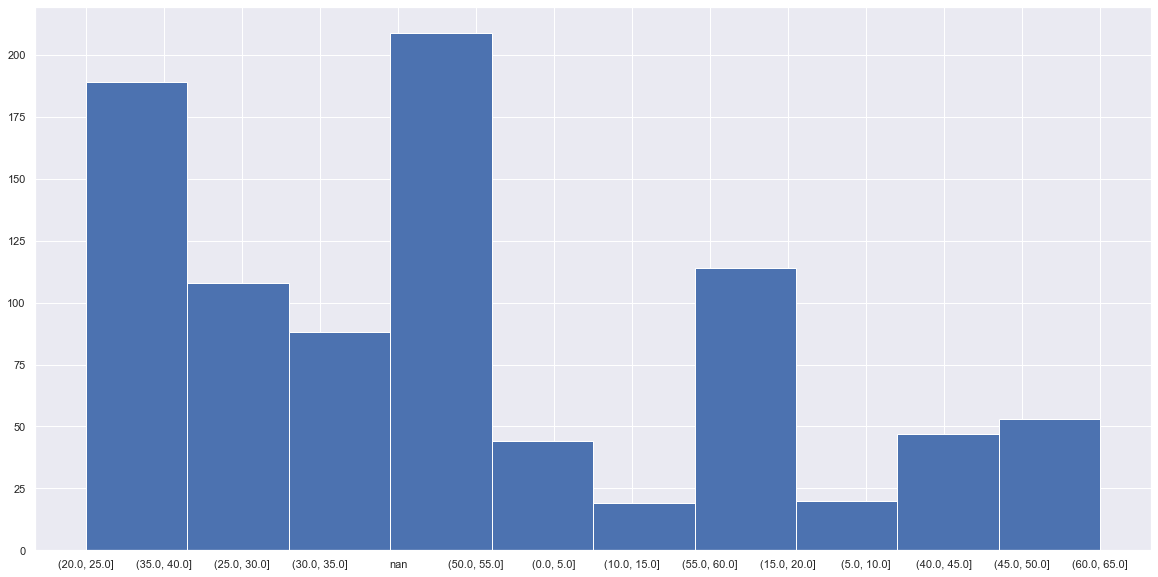

In [138]:
age_bins = pd.cut(train_data.Age, bins=range(0,70,5))
plt.figure(figsize=(20,10))
plt.hist(age_bins.astype(np.string_))

**Hypothesis**

We may also add to our assumptions based on the problem description noted earlier.

- Women (Sex=female) were more likely to have survived.
- Children (Age<?) were more likely to have survived.
- The upper-class passengers (Pclass=1) were more likely to have survived.



### Survival Rate by Pclass

In [256]:
train_data.groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)[['Pclass', 'Survived']]

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Survival Rate by Sex


In [261]:
train_data.groupby('Sex', as_index=False).mean()[['Sex', 'Survived']]


,Sex,Survived
0,female,0.742038
1,male,0.188908


### Survival Rate by SibSp

In [269]:
train_data.groupby('SibSp', as_index=False).mean()[['SibSp', 'Survived']].sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### Survival Rate by Parch

In [277]:
train_data.groupby('Parch', as_index=False).mean()[['Parch', 'Survived']].sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Visualizing Data